## Linear Function

http://www.matematicasvisuales.com/english/html/analysis/derivative/quadratic.html

Position and velocity:

- The derivative of the equation gives us the rate of change of moving particle/body with respect to time(wrt).
- The derivative of this equation gives us the rate of change(velocity) at a given time t.

Notes:
- The derivative(rate of change) of a straight line is always constant and parallel to the x-axis.
- The derivative of the quadratic equation (x^2) is always straight line.
- The derivative of a poly function may be ploy or quadratic depending on the given poly equation but one less than the given power of poly.

Here, I'm assuming first order derivatives only for the above case.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Distance cover by a car follows below equation:

position = 20t + 5

where t = time

In [2]:
def position_func(t):
    
    return 20*t + 5

In [3]:
t = np.linspace(0, 10, 100)

t

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

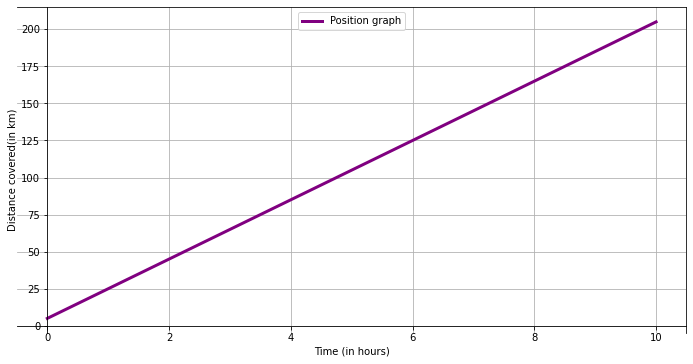

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(t, position_func(t), 
         color='purple', 
         lw=3,
         label='Position graph')

plt.gca().spines['left'].set_position('zero',) 
plt.gca().spines['bottom'].set_position('zero',)

plt.legend(loc='upper center')

plt.xlabel("Time (in hours)")
plt.ylabel("Distance covered(in km)")

plt.grid(True)

##### First we will use the manual method that we used in last demo then we will use scipy and sympy lib.

In [6]:
def get_derivative(f, t, method='central', h=0.0001):
    
    if method == 'central':
        return (f(t + h) - f(t - h)) / (2 * h)
    
    elif method == 'forward':
        return (f(t + h) - f(t)) / h
    
    elif method == 'backward':
        return (f(t) - f(t - h)) / h
    
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

##### Speed of car at t=5

In [13]:
velocity_5 = get_derivative(position_func, 5)

velocity_5

19.99999999995339

In [14]:
velocity_10 = get_derivative(position_func, 10)

velocity_10

20.000000000095497

### Using Scipy

##### Again we will calculate the speed of car at t=5 and t=10

In [15]:
from scipy.misc import derivative

In [16]:
derivative(position_func, 5)

20.0

In [17]:
derivative(position_func, 10)

20.0

#### Plotting distance and speed graph

In [18]:
def get_velocity(t):
    
    return derivative(position_func, t)

- The drivative of straight line always gives a constant values which parallel to x-axis.
- Find velocity at t = 4 sec.

In [19]:
t_1 = 4

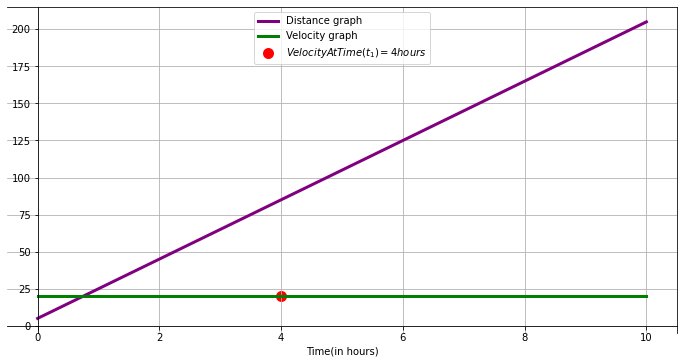

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(t, position_func(t), 
         color='purple', 
         lw=3,
         label='Distance graph')

plt.plot(t, get_velocity(t), 
         color='green',
         lw=3,
         label='Velocity graph')

plt.scatter(t_1, derivative(position_func, t_1), 
         color='red',
         lw=5,
         label=r'$VelocityAtTime (t_1) = 4hours$')

plt.gca().spines['left'].set_position('zero',) 
plt.gca().spines['bottom'].set_position('zero',)

plt.legend(loc='upper center')

plt.xlabel("Time(in hours)")

plt.grid(True)

### Using Sympy

In [24]:
import sympy as sp

In [25]:
t = sp.Symbol('t')

t

t

In [26]:
position_eq = 2*t + 5

position_eq

2*t + 5

In [28]:
velocity_eq = sp.diff(position_eq, t)

velocity_eq

2

## Quadratic Equation

### Find, where you get minimum error

- To do this, first you've to draw a tangent line at that particular point
- The slope of tangent line at any point gives the rate of change of error at that point

#### Let our loss function in quardaric function as like given below
https://core.ac.uk/download/pdf/213011306.pdf

f(x) = x^2 + 0x + 0

In [32]:
x = np.linspace(-10, 10, 100)

In [33]:
def f(x):
    return x**2 + 0*x + 0

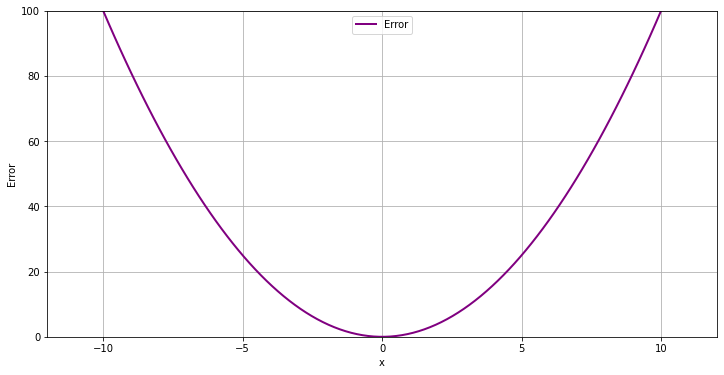

In [53]:
plt.figure(figsize=(12, 6))

plt.plot(x, f(x), 
         color='purple',
         lw = 2,
         label='Error')

plt.xlim(-12, 12)
plt.ylim(0, 100)

plt.xlabel("x")
plt.ylabel("Error")
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

### Define tangent line

Given two different points (x1, y1) and (x2, y2), there is exactly one line that passes through them. There are several ways to write a linear equation of this line.

If x1 ≠ x2, the slope of the line is 

m = (y2 - y1) / (x2 - x1)

y = m(x - x1) + y1

https://en.wikipedia.org/wiki/Linear_equation#Two-point_form

In [54]:
def tangent_line(x, x1, y1):
    m = derivative(f, x1)
    
    return m * (x - x1) + y1

#### Find the rate of loss change at specific point (x1, y1)

In [55]:
x1 = 5

y1 = f(x1)

In [59]:
print(f'What will be the rate of change of error at {x1, y1}? = {derivative(f, x1)}')

What will be the rate of change of error at (5, 25)? = 10.0


In [57]:
# define t range for tangent

x_range = np.linspace(x1 - 5, x1 + 5, 100)

- To find slope of tangent line, just take tan(\theta) of tangent.
tan(theta) = 25/2.5 = 10

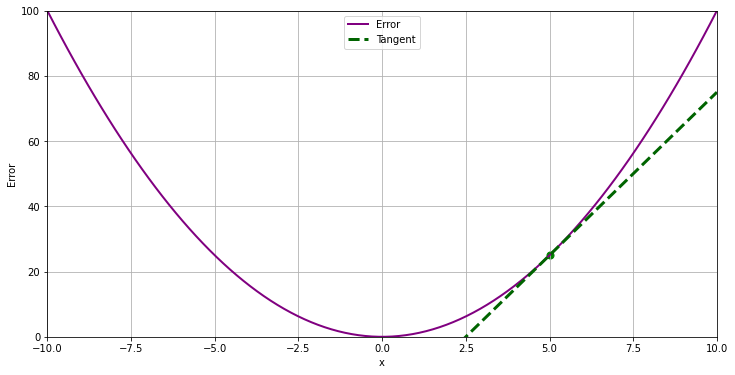

In [58]:
plt.figure(figsize=(12, 6))

plt.plot(x, f(x), 
         color='purple',
         lw = 2,
         label='Error')

plt.scatter(x1, y1, color = 'green', s = 50)

plt.plot(x_range, tangent_line(x_range, x1, y1), 
         linestyle='--', 
         color = 'darkgreen', 
         lw = 3, 
         label= 'Tangent')


plt.xlim(-10, 10)
plt.ylim(0, 100)

plt.xlabel("x")
plt.ylabel("Error")

plt.legend(loc='upper center')
plt.grid(True)
plt.show()

In [48]:
x2 = 2

y2 = f(x2)

In [60]:
print(f'What will be the rate of change of error at {x2, y2}? = {derivative(f, x2)}')

What will be the rate of change of error at (2, 4)? = 4.0


In [61]:
# define t range for tangent

x_range = np.linspace(x2 - 3, x2 + 3, 100)

you'll get tan(theta) = 4

Note:- This graph indicate as you move bottom of the convex curve your rate of change of error will be lower

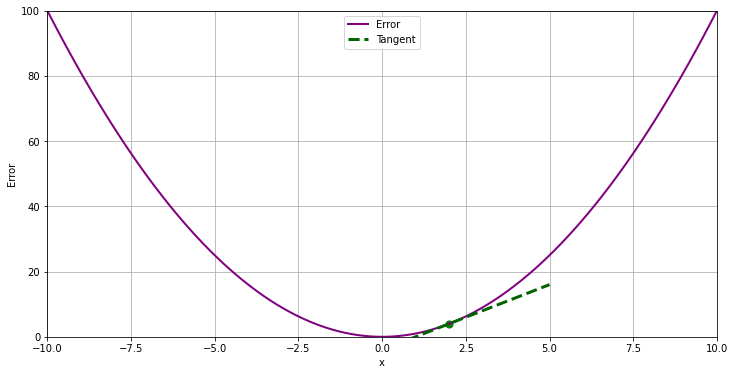

In [62]:
plt.figure(figsize=(12, 6))

plt.plot(x, f(x), 
         color='purple',
         lw = 2,
         label='Error')

plt.scatter(x2, y2, color = 'green', s = 50)
plt.plot(x_range, tangent_line(x_range, x2, y2), 
         linestyle='--', 
         color = 'darkgreen', 
         lw = 3, 
         label= 'Tangent')


plt.xlim(-10, 10)
plt.ylim(0, 100)

plt.xlabel("x")
plt.ylabel("Error")

plt.legend(loc='upper center')
plt.grid(True)
plt.show()

##### Lets take a particle which follow below equation for position at time t:

position = 8t^2 + 2t + 1

and find derivative for given time from 0 to 10

t = np.linspace(0, 10)

In [80]:
t = np.linspace(0, 10, 100)

In [81]:
def position_func(t):
    
    return 8*t**2 + 2*t + 1

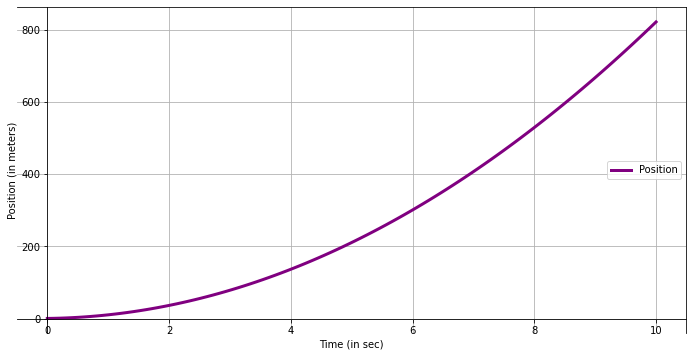

In [82]:
plt.figure(figsize=(12, 6))

plt.plot(t, position_func(t), 
         color='purple',
         lw=3,
         label='Position')

plt.gca().spines['left'].set_position('zero',) 
plt.gca().spines['bottom'].set_position('zero',)

plt.legend(loc='center right')

plt.xlabel("Time (in sec)")
plt.ylabel("Position (in meters)")

plt.grid(True)

#### Find the velocity of moving partical at given specific point at t = 4, on graph
- To do this, first you've to draw a tangent line at that particular poin and then the slope of tangent line gives the rate of change(velocity/speed) for that particular point.

In [83]:
t1 = 4
y1 = position_func(t1)

In [84]:
print(f'What will be velocity at {t1, y1}? = {derivative(position_func, t1)}')

What will be velocity at (4, 137)? = 66.0


### Define tangent line
### y = m(x - x1) + y1

In [85]:
def tangent_line(t, t1, y1):
    m = derivative(position_func, t1)
    
    return m * (t - t1) + y1

In [86]:
t_range = np.linspace(t1 - 3, t1 + 3, 100)

- To find slope of tangent line, just take tan(\theta) of tangent.
tan(theta) under the tangent line to the x-axis

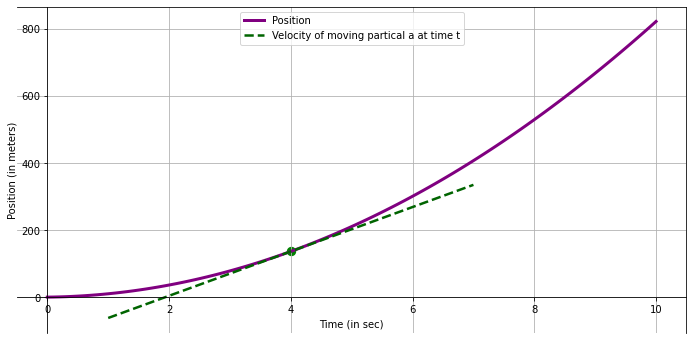

In [87]:
plt.figure(figsize=(12, 6))

plt.plot(t, position_func(t), 
         color='purple',
         lw = 3,
         label='Position')

plt.scatter(t1, y1, color = 'green', s = 70)
plt.plot(t_range, tangent_line(t_range, t1, y1), 
         linestyle='--', 
         color = 'darkgreen', 
         lw = 2.5, 
         label= 'Velocity of moving partical a at time t')


plt.gca().spines['left'].set_position('zero',) 
plt.gca().spines['bottom'].set_position('zero',)

plt.xlabel("Time (in sec)")
plt.ylabel("Position (in meters)")
plt.legend(loc='upper center')
plt.grid(True)
plt.show()

### Using Sympy

In [88]:
t = sp.Symbol('t')

In [89]:
position_eq = 8*t**2 + 2*t + 1

position_eq

8*t**2 + 2*t + 1

In [90]:
velocity_eq = sp.diff(position_eq, t)

velocity_eq

16*t + 2

In [91]:
velocity_eq.subs(t, 1)

18

In [92]:
velocity_eq.subs(t, 5)

82

In [93]:
velocity_eq.subs(t, 10)

162

## Polynomial Function

##### A particle follows this position equation:

position = -t^3 + 8*t^2 + 2*t + 1

In [99]:
def particle_trace(t):
    
    return -t**3 + 8*t**2 + 2*t + 1

In [100]:
t = np.linspace(0, 8.25)

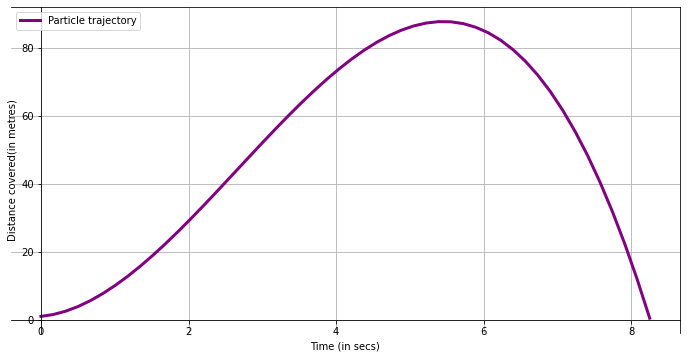

In [101]:
plt.figure(figsize=(12, 6))

plt.plot(t, particle_trace(t), 
         color='purple',
         lw=3,
         label='Particle trajectory')

plt.gca().spines['left'].set_position('zero',) 
plt.gca().spines['bottom'].set_position('zero',)

plt.legend(loc='upper left')

plt.xlabel("Time (in secs)")
plt.ylabel("Distance covered(in metres)")

plt.grid(True)

### Green line is represent the derivative equation  of given purple curve.

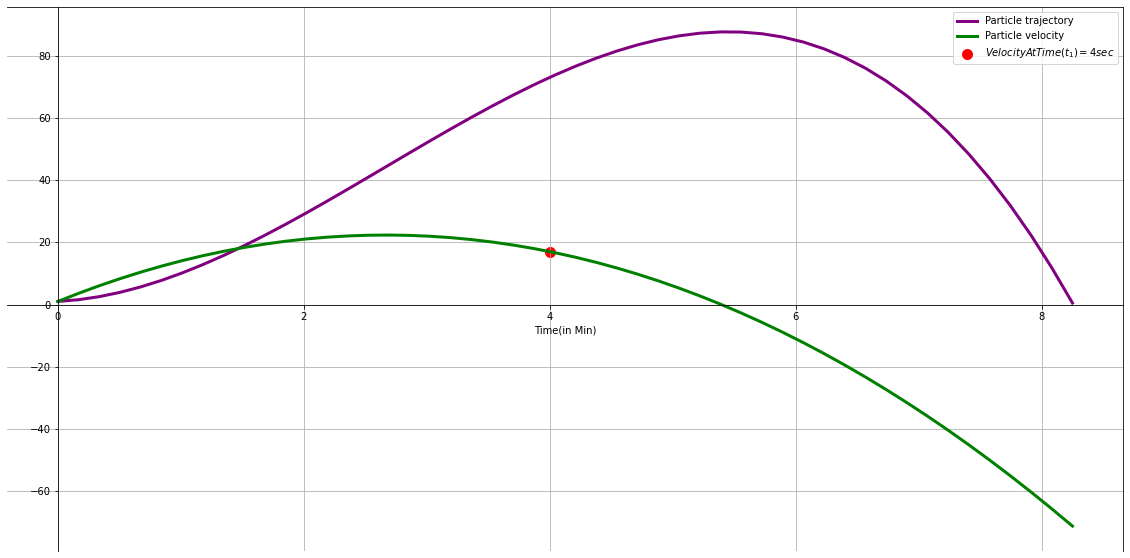

In [102]:
plt.figure(figsize=(20, 10))

plt.plot(t, particle_trace(t), 
         color='purple', 
         lw=3,
         label='Particle trajectory')

plt.plot(t, derivative(particle_trace, t), 
         color='green', 
         lw=3,
         label='Particle velocity')

plt.scatter(t_1, derivative(particle_trace, t_1), 
         color='red',
         lw=5,
         label=r'$VelocityAtTime (t_1) = 4sec$')

plt.gca().spines['left'].set_position('zero',) 
plt.gca().spines['bottom'].set_position('zero',)

plt.legend(loc='upper right')
plt.xlabel("Time(in Min)")

plt.grid(True)

### Using Sympy

In [107]:
t = sp.Symbol('t')

In [108]:
particle_trace_eq = -t**3 + 8*t**2 + 2*t + 1

particle_trace_eq

-t**3 + 8*t**2 + 2*t + 1

In [109]:
particle_velocity = sp.diff(particle_trace_eq, t)

particle_velocity

-3*t**2 + 16*t + 2

### Particle velocity at time = t

In [110]:
particle_velocity.subs(t, 2)

22

In [111]:
particle_velocity.subs(t, 3)

23

In [112]:
particle_velocity.subs(t, 5.45)

0.0925000000000011

In [113]:
particle_velocity.subs(t, 7)

-33

In [114]:
particle_velocity.subs(t, 10)

-138